# TASK 01- HUMAN CLASSIFICATION

In [4]:
import cv2
import numpy as np 
import os
import io
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io, data, exposure, morphology
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from pandas import DataFrame
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
import joblib
from skimage.feature import hog

## Import Image file path
### Data is read from the desired path and stored in separate variables for Training and Testing

In [5]:
path_train='/Users/admin/Documents/3rdSem/CV/Assignment01/Q1/INRIA_Dataset_Samples/Train'
path_test='/Users/admin/Documents/3rdSem/CV/Assignment01/Q1/INRIA_Dataset_Samples/Test'
images_train=[]
images_test=[]

for folder in os.listdir(path_train):
    if folder!=".DS_Store":
        for file in os.listdir(os.path.join(path_train,folder)):
                images_train.append(os.path.join(path_train, os.path.join(folder,file)))
np.random.shuffle(images_train)

for folder in os.listdir(path_test):
    if folder!=".DS_Store":
        for file in os.listdir(os.path.join(path_test,folder)):
                images_test.append(os.path.join(path_test, os.path.join(folder,file)))


## Functions

In [6]:
#This function reads a image using image path
def show(img):
    io.imshow(img)
    plt.show()
    
def readImage(img_path):
    img = io.imread(img_path, 0)
    return cv2.resize(img,(150,150)) 

#This function finds optimal parameters for SVM through grid search
def svcParamSelection(X, y, nfolds):
    Cs = [0.5, 0.1, 0.15, 0.2, 0.3]
    gammas = [0.1, 0.11, 0.095, 0.105]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search_svc = GridSearchCV(SVC(), param_grid, cv=nfolds)
    grid_search_svc.fit(X, y)
    grid_search_svc.best_params_
    return grid_search_svc.best_params_

#This function finds optimal parameters for RFC through grid search
def rfcParamSelection(X, y, nfolds):
    param_grid = { 
    'n_estimators': [10,20,30,50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1,2],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']}
    grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= nfolds)
    grid_search_rfc.fit(X, y)
    return grid_search_rfc.best_params_

## Extract HOG Features & Labeling Images

In [7]:
#Training Data
fd_train=[]
for fd in images_train:
    img = readImage(fd)
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
    fd_train.append(fd)
hog_features_train=np.array(fd_train)

train_labels=[]
for img_path in images_train:
    if("neg" in img_path):
        train_labels.append(0)
    elif("pos" in img_path):
        train_labels.append(1)
        
train_labels=(np.array([train_labels])).T

#Testing Data
fd_test=[]
for fd in images_test:
    img = readImage(fd)
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
    fd_test.append(fd)
hog_features_test=np.array(fd_test)

test_labels=[]
for img_path in images_test:
    if("neg" in img_path):
        test_labels.append(0)
    elif("pos" in img_path):
        test_labels.append(1)
        
test_labels=(np.array([test_labels])).T

#Copying the testing and training data
x_train,y_train=np.copy(hog_features_train),np.copy(train_labels).ravel()
x_test,y_test=np.copy(hog_features_test),np.copy(test_labels).ravel()

## Training SVM model
### note- The model is already trained and is saved. So the parameter selection and model fitting part here is commented

In [8]:
# params_svc = svcParamSelection(x_train, y_train, 5)

# C_param, gamma_param = params_svc.get("C"), params_svc.get("gamma")

# clf=svm.SVC(C =  C_param, gamma = gamma_param)
# clf.fit(x_train,y_train)

#Loading the saved model
clf=joblib.load('SVM_model.sav')
y_pred_svc=clf.predict(x_test)

## Training RFC model
### note- The model is already trained and is saved. So the parameter selection and model fitting part here is commented

In [9]:
# params_rfc=rfcParamSelection(x_train, y_train, 5)

# criteria_param,depth_param, feature_param,leaf_param,nest_param = params_rfc.get("criterion"), params_rfc.get("max_depth"),\
# params_rfc.get("max_features"),params_rfc.get("min_samples_leaf"),params_rfc.get("n_estimators")

# rfc=RandomForestClassifier(n_estimators=nest_param,criterion=criteria_param,max_depth=depth_param,max_features=feature_param,min_samples_leaf=leaf_param,random_state=0)
# rfc.fit(x_train,y_train)

#Loading the saved model
rfc=joblib.load('RFC_model.sav')
y_pred_rfc=rfc.predict(x_test)

## Saving the models

In [10]:
# Saving the SVM model
# f1= 'SVM_model.sav'
# joblib.dump(clf,f1)

# Saving the RFC model
# f2= 'RFC_model.sav'
# joblib.dump(rfc,f2)

## Printing the Outputs

In [11]:
#Printing the Accuracy
print("Accuracy for SVM model: "+str(accuracy_score(y_test, y_pred_svc)))
print('\n')
print("Accuracy for RFC model: "+str(accuracy_score(y_test, y_pred_rfc)))

#Printing the Classification Report
print('\n')
print("Classification Report for SVM model")
print(classification_report(y_test, y_pred_svc))
print('\n')
print("Classification Report for SVM model")
print(classification_report(y_test, y_pred_rfc))

Accuracy for SVM model: 0.9810725552050473


Accuracy for RFC model: 0.9596214511041009


Classification Report for SVM model
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       453
           1       0.98      0.99      0.99      1132

    accuracy                           0.98      1585
   macro avg       0.98      0.97      0.98      1585
weighted avg       0.98      0.98      0.98      1585



Classification Report for SVM model
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       453
           1       0.95      1.00      0.97      1132

    accuracy                           0.96      1585
   macro avg       0.97      0.93      0.95      1585
weighted avg       0.96      0.96      0.96      1585



## Confusion Matrix

Text(0.5, 0, '')

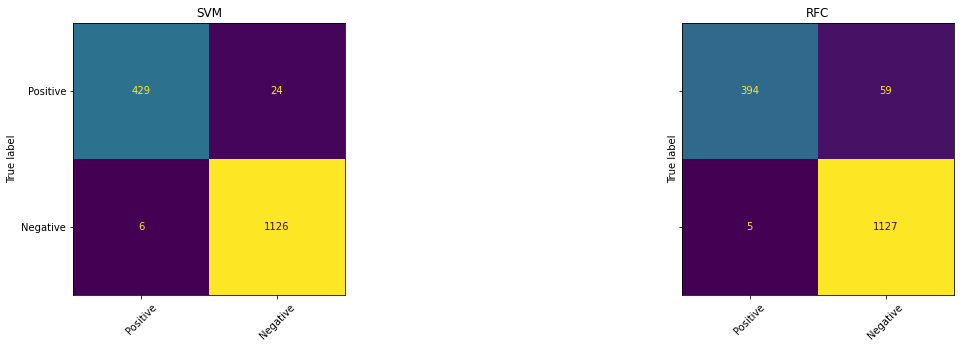

In [12]:
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharey='row')
Index= ['Positive','Negative']

#Confusion matrix for SVM model
cf_matrix1 = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(cf_matrix1,display_labels=Index)
disp.plot(ax=axes[0], xticks_rotation=45)
disp.ax_.set_title("SVM")
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')

#Confusion matrix for RFC model
cf_matrix2 = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(cf_matrix2,display_labels=Index)
disp.plot(ax=axes[1], xticks_rotation=45)
disp.ax_.set_title("RFC")
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')

In [60]:
svm_mismatch=[]
svm_match=[]
count=0
for i in y_pred_svc:
    if i!=y_test[count]:
        svm_mismatch.append(count)
    else:
        svm_match.append(count)
    count=count+1
len(svm_mismatch)

rfc_mismatch=[]
rfc_match=[]
count=0
for i in y_pred_rfc:
    if i!=y_test[count]:
        rfc_mismatch.append(count)
    else:
        rfc_match.append(count)
    count=count+1

Some correctly classified images for SVM

Classified as Human (Positive)


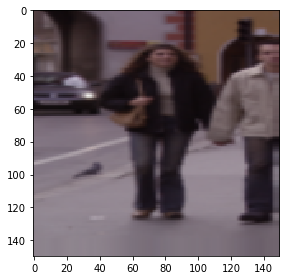


Classified as Nature (Negative)


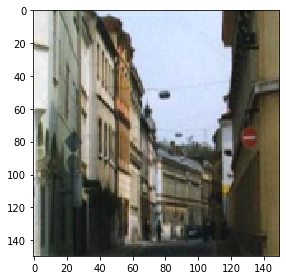

In [61]:
print('Some correctly classified images for SVM')
print('\nClassified as Human (Positive)')
img1=readImage(images_test[svm_match[1300]])
show(img1)
print('\nClassified as Nature (Negative)')
img3=readImage(images_test[svm_match[10]])
show(img3)

Some Missclassified images for SVM


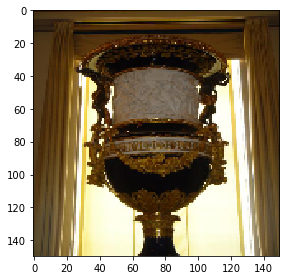

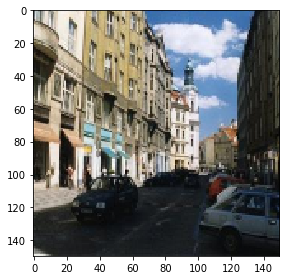

In [62]:
print('Some Missclassified images for SVM')
img5=readImage(images_test[svm_mismatch[20]])
show(img5)
img7=readImage(images_test[svm_match[26]])
show(img7)

Some correctly classified images for RFC

Classified as Human (Positive)


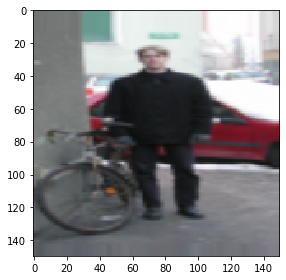


Classified as Nature (Negative)


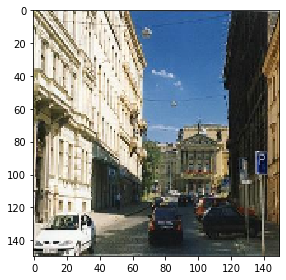

In [63]:
print('Some correctly classified images for RFC')
print('\nClassified as Human (Positive)')
img11=readImage(images_test[rfc_match[1300]])
show(img11)
print('\nClassified as Nature (Negative)')
img31=readImage(images_test[rfc_match[10]])
show(img31)

Some Missclassified images for RFC


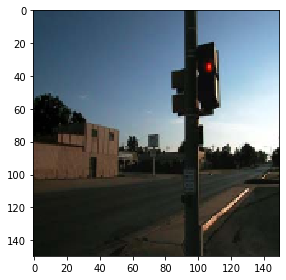

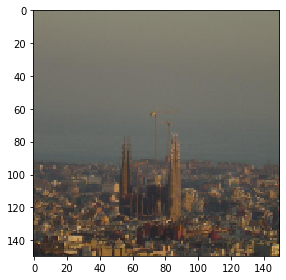

In [64]:
print('Some Missclassified images for RFC')
img51=readImage(images_test[rfc_mismatch[20]])
show(img51)
img71=readImage(images_test[rfc_match[26]])
show(img71)